### Importação dos dados



In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [31]:
import pandas as pd

# dados do faturamento
data = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento total": [
        1534509.12,
        1488459.06,
        1464025.03,
        1384497.58
    ]
}

df = pd.DataFrame(data)

# formatar como tabela Markdown
table_markdown = df.to_markdown(index=False, tablefmt="github")
print(table_markdown)



| Loja   |   Faturamento total |
|--------|---------------------|
| Loja 1 |         1.53451e+06 |
| Loja 2 |         1.48846e+06 |
| Loja 3 |         1.46403e+06 |
| Loja 4 |         1.3845e+06  |


# 2. Vendas por Categoria

In [32]:
# 2. Vendas por Categoria

# Create a dictionary of dataframes
lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
}

# Criando uma tabela com o total vendido por categoria em cada loja
categorias_por_loja = {}

for nome, df_loja in lojas.items():
    # Use 'Categoria do Produto' and sum 'Preço' for sales by category
    categorias = df_loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
    categorias_por_loja[nome] = categorias

# Exibindo todas as lojas e suas categorias mais vendidas
for loja_nome, categorias in categorias_por_loja.items():
    print(f"\nCategorias mais vendidas da {loja_nome}:")
    display(categorias.head(10))


Categorias mais vendidas da Loja 1:


,Preço
Categoria do Produto,
eletronicos,572659.23
eletrodomesticos,484913.36
moveis,250178.11
instrumentos musicais,121731.69
esporte e lazer,52387.55
brinquedos,23993.78
utilidades domesticas,16931.48
livros,11713.92



Categorias mais vendidas da Loja 2:


,Preço
Categoria do Produto,
eletronicos,547773.71
eletrodomesticos,464758.13
moveis,235234.68
instrumentos musicais,139987.03
esporte e lazer,46326.09
brinquedos,21262.21
utilidades domesticas,19662.86
livros,13454.35



Categorias mais vendidas da Loja 3:


,Preço
Categoria do Produto,
eletronicos,547699.92
eletrodomesticos,438984.89
moveis,268095.56
instrumentos musicais,103174.45
esporte e lazer,47456.10
brinquedos,25869.20
utilidades domesticas,20080.21
livros,12664.70



Categorias mais vendidas da Loja 4:


,Preço
Categoria do Produto,
eletronicos,545966.86
eletrodomesticos,377680.65
moveis,256705.65
instrumentos musicais,100136.50
esporte e lazer,44465.65
brinquedos,27015.67
utilidades domesticas,20098.83
livros,12427.77


# 3. Média de Avaliação das Lojas


In [36]:
# 3. Média de Avaliação das Lojas

print("MÉDIA DE AVALIAÇÃO POR LOJA\n")

# Calculate mean rating for each store and store in a list
rating_data = []
for nome, df in lojas.items():
    media = df['Avaliação da compra'].mean()
    print(f"{nome}: {media:.2f}")
    rating_data.append({'Loja': nome, 'Média de Avaliação': media})

# Create resumo_df for plotting
resumo_df_ratings = pd.DataFrame(rating_data)

MÉDIA DE AVALIAÇÃO POR LOJA

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [42]:
# 4. Produtos Mais e Menos Vendidos

print("PRODUTOS + E - VENDIDOS EM CADA LOJA\n")

for nome, df in lojas.items():
    print(f"\n📌 {nome}")

    # Agrupando os produtos pelo valor total vendido
    produtos = df.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

    # Top 10 mais vendidos
    print("\n🔝 Top 10 produtos MAIS vendidos:")
    display(produtos.head(10))

    # Top 10 menos vendidos
    print("\n🔻 Top 10 produtos MENOS vendidos:")
    display(produtos.tail(10))

PRODUTOS + E - VENDIDOS EM CADA LOJA


📌 Loja 1

🔝 Top 10 produtos MAIS vendidos:


,Preço
Produto,
TV Led UHD 4K,189534.28
Geladeira,149524.28
Celular Plus X42,130536.40
Smart TV,89936.15
Lavadora de roupas,87711.30
Lava louças,82739.86
Secadora de roupas,78749.73
Tablet ABXY,63520.11
Bateria,50258.34



🔻 Top 10 produtos MENOS vendidos:


,Preço
Produto,
Iniciando em programação,2791.03
Ciência de dados com python,2752.18
Boneca bebê,2583.17
Blocos de montar,2487.74
Dashboards com Power BI,1940.86
Xadrez de madeira,1907.42
Jogo de copos,1812.15
Cubo mágico 8x8,929.27
Dinossauro Rex,918.40



📌 Loja 2

🔝 Top 10 produtos MAIS vendidos:


,Preço
Produto,
Celular Plus X42,150967.83
TV Led UHD 4K,137833.06
Geladeira,130176.48
Lavadora de roupas,89016.81
Smart TV,81522.94
Secadora de roupas,78820.31
Lava louças,78357.00
Tablet ABXY,74945.97
Bateria,61566.87



🔻 Top 10 produtos MENOS vendidos:


,Preço
Produto,
Copo térmico,2874.63
Bola de basquete,2788.23
Blocos de montar,2385.91
Faqueiro,2310.25
Dashboards com Power BI,2132.93
Jogo de copos,2056.69
Xadrez de madeira,1717.05
Corda de pular,1142.54
Dinossauro Rex,1027.41



📌 Loja 3

🔝 Top 10 produtos MAIS vendidos:


,Preço
Produto,
Geladeira,133185.99
TV Led UHD 4K,128892.11
Celular Plus X42,124300.84
Smart TV,105116.46
Lava louças,85819.73
Tablet ABXY,77919.93
Lavadora de roupas,76612.58
Secadora de roupas,66397.97
Celular ABXY,57893.04



🔻 Top 10 produtos MENOS vendidos:


,Preço
Produto,
Boneca bebê,2577.11
Faqueiro,2368.26
Copo térmico,2300.69
Dashboards com Power BI,1829.81
Xadrez de madeira,1807.34
Blocos de montar,1649.81
Jogo de copos,1614.20
Corda de pular,1137.76
Dinossauro Rex,1060.78



📌 Loja 4

🔝 Top 10 produtos MAIS vendidos:


,Preço
Produto,
Celular Plus X42,128930.07
TV Led UHD 4K,120393.25
Smart TV,110387.57
Geladeira,100362.59
Tablet ABXY,75630.75
Lava louças,73798.99
Lavadora de roupas,69951.68
Secadora de roupas,56349.30
Celular ABXY,53561.83



🔻 Top 10 produtos MENOS vendidos:


,Preço
Produto,
Copo térmico,2869.84
Iniciando em programação,2823.74
Ciência de dados com python,2811.87
Dashboards com Power BI,2654.28
Blocos de montar,2546.40
Jogo de copos,1962.24
Xadrez de madeira,1434.09
Dinossauro Rex,1143.94
Cubo mágico 8x8,997.38


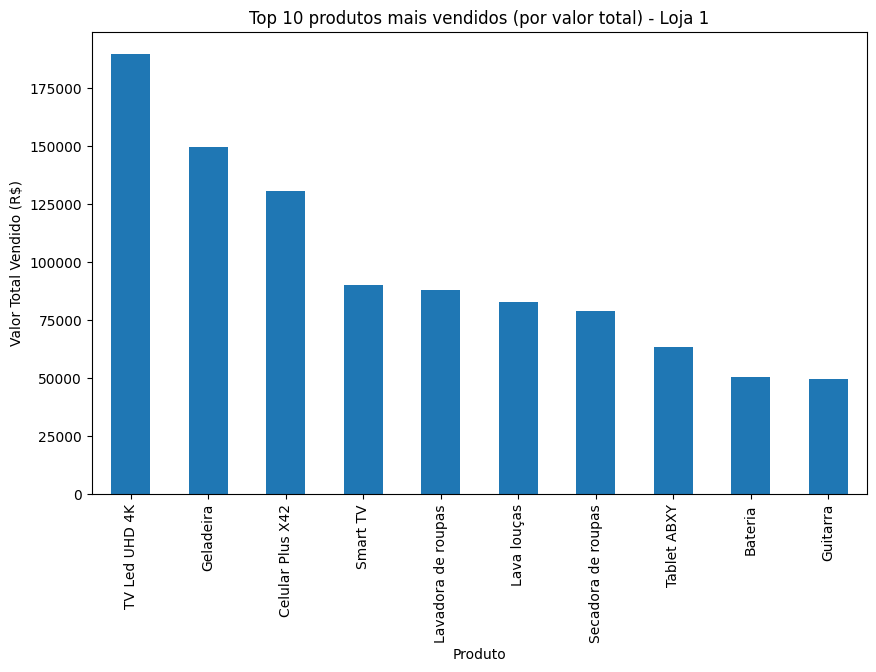

In [50]:
plt.figure(figsize=(10,6))
produtos_loja1 = lojas['Loja 1'].groupby('Produto')['Preço'].sum().sort_values(ascending=False).head(10)
produtos_loja1.plot(kind='bar')
plt.title("Top 10 produtos mais vendidos (por valor total) - Loja 1")
plt.xlabel("Produto")
plt.ylabel("Valor Total Vendido (R$)")
plt.show()

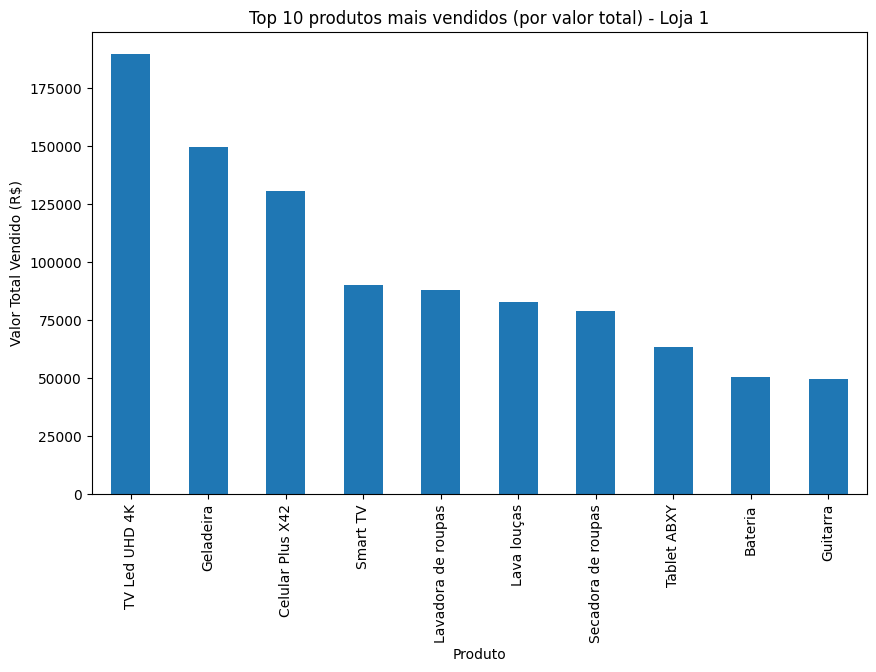

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
produtos_loja1 = lojas['Loja 1'].groupby('Produto')['Preço'].sum().sort_values(ascending=False).head(10)
produtos_loja1.plot(kind='bar')
plt.title("Top 10 produtos mais vendidos (por valor total) - Loja 1")
plt.xlabel("Produto")
plt.ylabel("Valor Total Vendido (R$)")
plt.show()

# 5. Frete Médio por Loja

FRETE MÉDIO POR LOJA

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


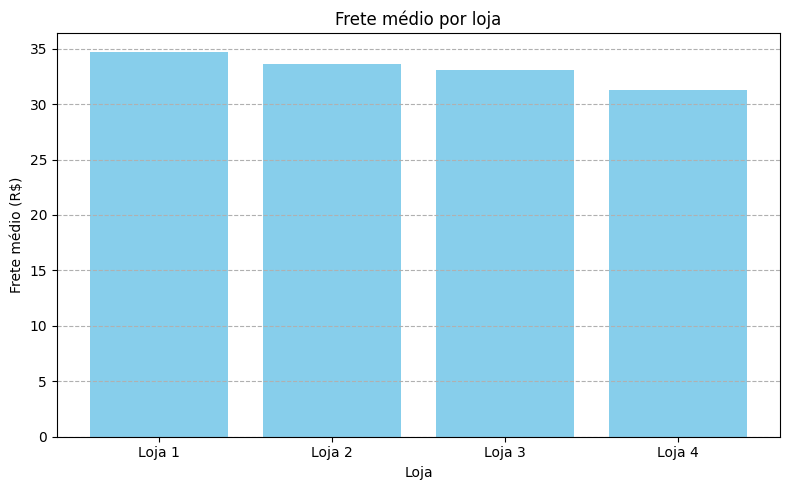

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# 5. Frete Médio por Loja

print("FRETE MÉDIO POR LOJA\n")

# Calculate mean shipping cost for each store and store in a list
frete_data = []
for nome, df_loja in lojas.items():
    frete_medio = df_loja['Frete'].mean()
    print(f"{nome}: R$ {frete_medio:.2f}")
    frete_data.append({'Loja': nome, 'Frete Médio': frete_medio})

# Create resumo_df for plotting
resumo_df = pd.DataFrame(frete_data)

# Gráfico do frete médio
plt.figure(figsize=(8, 5))
plt.bar(resumo_df['Loja'], resumo_df['Frete Médio'], color='skyblue')
plt.title("Frete médio por loja")
plt.xlabel("Loja")
plt.ylabel("Frete médio (R$)")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Relatório

Após analisar os dados das quatro lojas da Alura Store, foram comparadas as seguintes métricas: faturamento, avaliação dos clientes, categorias mais vendidas, produtos com maior e menor saída e custo médio de frete.

# Resultado das análises

Loja 1, Loja 2 e Loja 3 apresentam bom volume de vendas e faturamento maior.

A Loja 4 possui o menor faturamento total (R$ 1.384.497,58) entre todas.

Suas avaliações são parecidas com as demais, mas não se destaca em vendas.

Mesmo com o frete mais barato, a Loja 4 não converte isso em lucro nem alta demanda.

Possui também maior quantidade de produtos com baixa saída.

# Conclusão

📌 A loja que o Sr. João deve vender é a Loja 4.

Ela é a menos lucrativa, a que apresenta menor desempenho geral e possui baixo potencial de crescimento quando comparada às outras.
Vender a Loja 4 é a decisão financeiramente mais vantajosa para gerar capital para o novo negócio.